In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color =sns.color_palette()


In [9]:
powers = pd.read_csv("super_hero_powers.csv")
heroes = pd.read_csv('heroes_information.csv')

In [11]:
print(heroes.shape)
print(powers.shape)

(734, 11)
(667, 168)


In [12]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [13]:
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
heroes.loc[heroes['name']=='Superman',['name','Alignment']]

,name,Alignment
646,Superman,good


In [24]:
heroes.Alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [26]:
heroes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [27]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [28]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [32]:
heroes.Publisher.isnull().sum()

15

In [34]:
heroes.replace(to_replace='-', value='unknown', inplace= True)

In [35]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [36]:
heroes.Publisher.isnull().sum()

15

In [41]:
heroes['Weight'].value_counts().head(3)

-99.0    237
 79.0     23
 54.0     23
Name: Weight, dtype: int64

In [42]:
heroes[heroes.Weight.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
286,Godzilla,unknown,unknown,Kaiju,unknown,108.0,NaN,grey,bad,NaN
389,King Kong,Male,yellow,Animal,Black,30.5,NaN,unknown,good,NaN


In [43]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,unknown,bad,-99.0


In [49]:
heroes.replace(-99.0, value=np.nan, inplace = True)

In [50]:
heroes.Weight.isnull().sum()

239

In [52]:
publisher_series = heroes['Publisher'].value_counts()

In [65]:
publisher_series.sum()

719

In [66]:
publisher_series.head(3)

Marvel Comics    388
DC Comics        215
NBC - Heroes      19
Name: Publisher, dtype: int64

In [53]:

publishers = list(publisher_series.index)
publications = list((publisher_series/publisher_series.sum())*100)


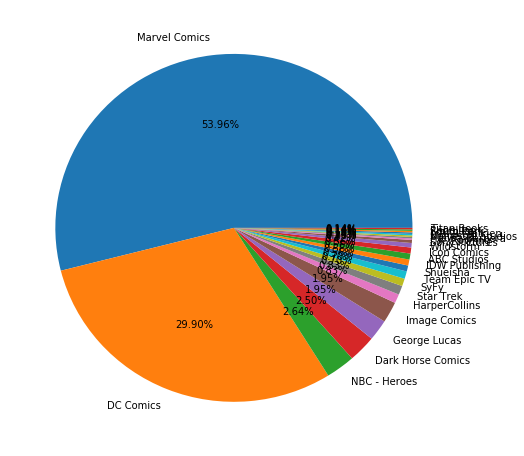

In [61]:
plt.pie(publications,labels=publishers,
       autopct='%1.2f%%')

# plt.figure(figsize=(5,18), dpi=100)

fig = plt.gcf()
fig.set_size_inches(8,8)

plt.show()


In [62]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools

py.init_notebook_mode(connected=True)

In [63]:
draw = go.Pie(labels=publishers, values=publications)

layout = go.Layout(
    title="%age of Publications by Publishers",
    height=650,
    width=650
)

data = [draw]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='publications-by-publishers')